# Problem 02: Radial Velocity Method for Finding Exoplanets

# Approach

1. **Load the Dataset**  
   Load the dataset containing the time and radial velocity data of the exoplanets.

2. **Generate the Scatter Plot**  
   Create a scatter plot to visualize the relationship between **time** and **radial velocity**.

3. **Estimate Orbital Period of 51 Pegasi**  
   Use periodic variations observed in the scatter plot to estimate the **orbital period of 51 Pegasi**.

4. **Lomb-Scargle Periodogram Analysis**  
   Perform a **Lomb-Scargle periodogram analysis** to more rigorously estimate the orbital period, accounting for uneven sampling of the data.

5. **Plot the Folded Radial Velocity Curve**  
   Plot the **folded radial velocity curve** to visualize the periodic motion of the star and confirm the estimated orbital period.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle

In [5]:
data = np.loadtxt('RV_51Pegasi_Data.txt')
time = data[:, 0]
radial_velocity = data[:, 1]
data #verifying the data

array([[  2.67365, -40.87   ,   3.3    ],
       [  2.80873, -46.96   ,   3.6    ],
       [  2.95979, -47.39   ,   4.5    ],
       [  3.62695, -19.85   ,   2.9    ],
       [  3.73265, -13.47   ,   2.6    ],
       [  3.90077,  -5.782  ,   3.     ],
       [  4.60753,  49.41   ,   2.2    ],
       [  4.78429,  58.66   ,   2.5    ],
       [  4.90699,  63.2    ,   3.2    ],
       [  5.60503,  45.6    ,   2.7    ],
       [  5.92544,  17.88   ,   3.3    ],
       [ 11.6443 , -45.5    ,   4.7    ],
       [ 11.8378 , -38.98   ,   4.9    ],
       [ 12.6355 ,  27.27   ,   5.2    ],
       [ 12.8664 ,  32.45   ,   6.5    ],
       [ 13.6242 ,  63.38   ,   4.6    ],
       [ 13.8295 ,  54.78   ,   6.2    ],
       [ 14.6428 ,  -1.34   ,   5.4    ],
       [ 14.7229 ,  -5.477  ,   5.5    ],
       [ 14.8161 , -10.73   ,   4.4    ],
       [ 14.9043 , -26.29   ,   7.3    ],
       [ 15.6261 , -50.68   ,   4.6    ],
       [ 15.7467 , -45.78   ,   4.6    ],
       [ 15.8654 , -57.54   ,   5.

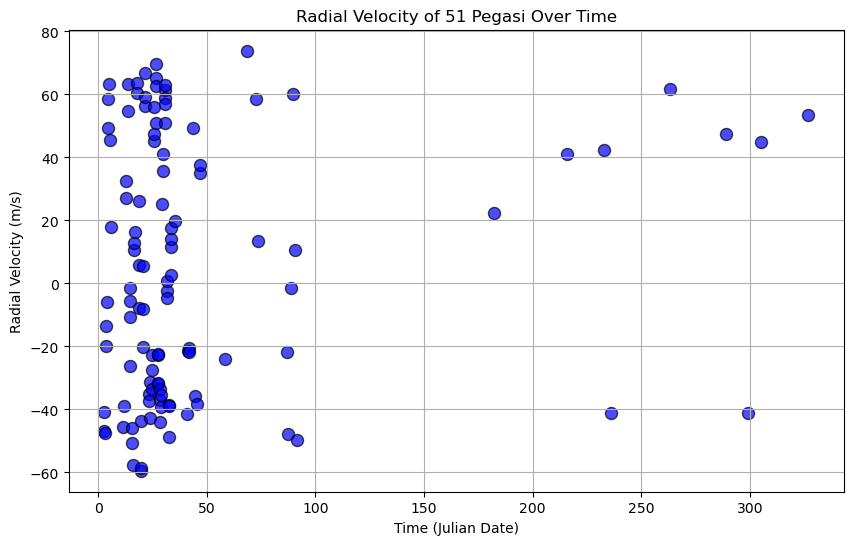

In [6]:
time = data[:, 0]
radial_velocity = data[:, 1]
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time, radial_velocity, c='blue', s=75, edgecolors='black', alpha=0.7)
plt.title('Radial Velocity of 51 Pegasi Over Time')
plt.xlabel('Time (Julian Date)')
plt.ylabel('Radial Velocity (m/s)')
plt.grid(True)
plt.savefig('Radial_Velocity_curve.png', format='png')
plt.show()

# Insights

The scatter plot of **radial velocity measurements** against **time** reveals how the velocity of the star along the line of sight (toward or away from the observer) changes as the planet orbits the star.

- A **peak** is observed approximately every **4-5 days** in the initial cluttered region of the plot. 
- This interval corresponds to the **orbital period** of the planet, suggesting a periodic variation in the star’s motion due to the gravitational influence of the orbiting planet.


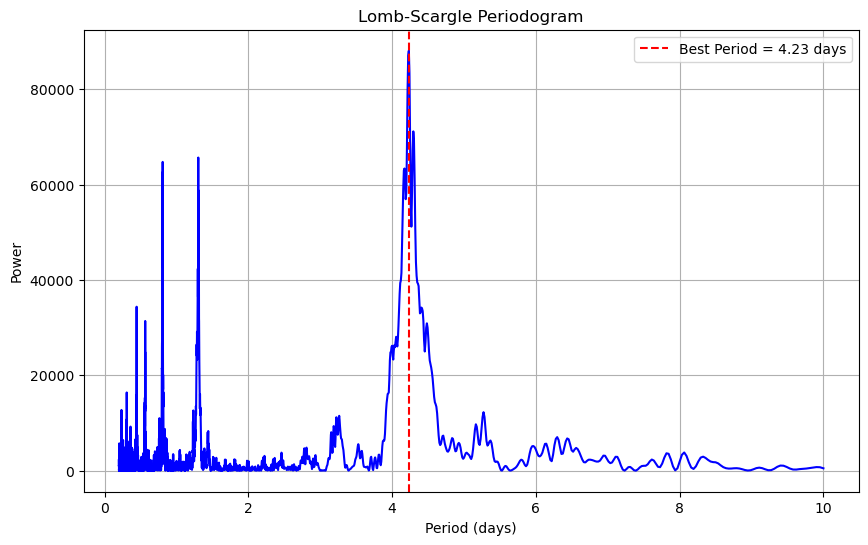

In [21]:
time = data[:, 0]
radial_velocity = data[:, 1]
# frequency range for analysis
frequencies = np.linspace(0.1, 5, 10000)  # Frequency range (in cycles per day) -- justified below
angular_frequencies = 2 * np.pi * frequencies

# Lomb-Scargle Periodogram
power = lombscargle(time, radial_velocity, angular_frequencies)

# Frequency corresponding to the maximum power
best_frequency = frequencies[np.argmax(power)]
best_period = 1 / best_frequency

# Periodogram
plt.figure(figsize=(10, 6))
plt.plot(1 / frequencies, power, color='blue')
plt.axvline(best_period, color='red', linestyle='--', label=f'Best Period = {best_period:.2f} days')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.legend()
plt.grid()
plt.savefig('Lomb_Scargle_Periodogram.png', format='png')
plt.show()

# Lomb-Scargle Periodogram Analysis

### 1. **Choosing the Frequency Range**
   We defined a frequency range spanning from **0.1 to 5** using **numpy's linspace**. This range was selected to cover potential periodic signals in the data.

### 2. **Calculating the Periodogram**
   For each angular frequency within the defined range, we calculated the corresponding power using the Lomb-Scargle periodogram formula. This allows us to identify the strength of periodic components at different frequencies.
   $$
    P_{\text{LS}} = \arg \max \left( \frac{1}{N} \sum_{i=1}^{N} \left( RV_i \cos(\omega t_i) + RV_i \sin(\omega t_i) \right) \right)
   $$

### 3. **Peak Identification**
   The **peak** in the periodogram corresponds to the frequency that best represents the periodic component in the data. This peak is the most significant feature of the periodogram, as it identifies the dominant oscillation in the dataset.

### 4. **Estimating the Orbital Period**
   Once the dominant frequency is identified, we can estimate the **orbital period** by taking the inverse of the dominant frequency. This gives us the estimated period of the underlying periodic motion.

## Justification of Parameters

### 1. **Frequency Range**
   The chosen frequency range should encompass the possible periods observed in exoplanetary systems. Hence, we have selected a range from **0.1 to 5 cycles per day**, corresponding to periods from **1 to 50 days**. This ensures that the analysis can capture short exoplanetary signals.

### 2. **Number of Frequencies**
   A **dense sampling** of frequencies is essential to ensure that the periodogram is smooth and that the peak is accurately located. Higher density provides a finer resolution, improving the precision of the detected peak and, consequently, the estimated orbital period.


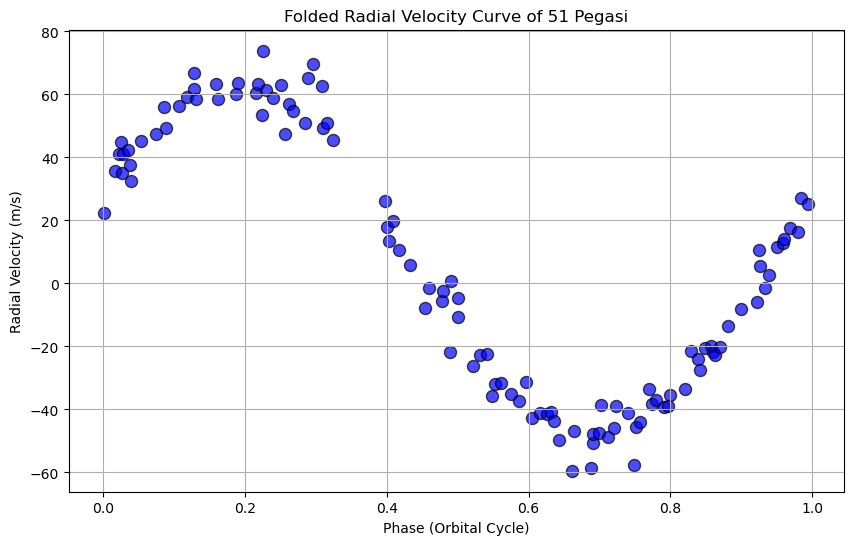

In [10]:
time = data[:, 0]
radial_velocity = data[:, 1]
# Derived orbital period (replace this with your calculated period from the periodogram analysis)
derived_period = best_period 
# Calculate the phase
phase = (time % derived_period) / derived_period

# Sort the data by phase for plotting purposes
sorted_indices = np.argsort(phase)
phase = phase[sorted_indices]
radial_velocity = radial_velocity[sorted_indices]

# Plot the folded radial velocity curve
plt.figure(figsize=(10, 6))
plt.scatter(phase, radial_velocity, c='blue', s=75, edgecolors='black', alpha=0.7)
plt.title('Folded Radial Velocity Curve of 51 Pegasi')
plt.xlabel('Phase (Orbital Cycle)')
plt.ylabel('Radial Velocity (m/s)')
plt.grid(True)
plt.savefig('Folded_radial_velocity_curve.png', format='png')
plt.show()

# Observations

### 1. Trends
Radial velocity data folded looks **sinusoidal** or almost sinusoidal in pattern. This pattern implies the periodic motion of the star due to the orbiting planet. Peaks correspond to the star moving **away** from us, while troughs correspond to the star moving **towards** us.

### 2. Noise
**Scatter** around the expected sinusoidal curve in the plot is an indication of **noise** in the measurements. This noise may be attributed to several causes, such as:

- **Observational errors**
- **Instrumental limitations**
- The existence of **other planetary companions** influencing the star's motion.
